In [21]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
import os

# Download the dataset
arjunbhasin2013_ccdata_path = kagglehub.dataset_download('arjunbhasin2013/ccdata')

# Find the downloaded file
for dirname, _, filenames in os.walk(arjunbhasin2013_ccdata_path):
    for filename in filenames:
        if filename == 'CC GENERAL.csv':
            file_path = os.path.join(dirname, filename)
            break
    else:
        continue
    break

print('Data source import complete.')

Data source import complete.


In [22]:
!pip install --upgrade simpsom

In [23]:
import pandas as pd
import numpy as np
import simpsom as sps
from sklearn.cluster import KMeans

In [24]:
data = pd.read_csv(file_path)

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [25]:
x = data.drop(columns=["CUST_ID"])

# Eksik verileri ortalama ile doldurma
x.fillna(x.mean(), inplace=True)

In [29]:
net=sps.SOMNet(20,20, x.values,PBC=True)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.


In [30]:
net.train(train_algo='batch',start_learning_rate=0.01,epochs=10000)

The map will be trained with the batch algorithm.
Training SOM... done!


In [31]:
hrt = np.array((net.project(x.values)))
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 0)

/usr/local/lib/python3.10/dist-packages/simpsom/network.py:629: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([pos[0]-0.125+random.random()*0.25 for pos in bmu_list],


<Figure size 640x480 with 0 Axes>

In [32]:
y_kmeans = kmeans.fit_predict(hrt)

In [33]:
y_kmeans
data['kümeler'] = y_kmeans

In [34]:
print("1 numaralı küme:")
print(data[data["kümeler"] == 0].head(5))

1 numaralı küme:
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   C10002  3202.467416           0.909091       0.00              0.00   
6   C10007   627.260806           1.000000    7091.01           6402.63   
15  C10016  6886.213231           1.000000    1611.70              0.00   
16  C10017  2072.074354           0.875000       0.00              0.00   
21  C10022  6369.531318           1.000000    6359.95           5910.04   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.00   6442.945483                  0.0   
6                   688.38      0.000000                  1.0   
15                 1611.70   2301.491267                  0.5   
16                    0.00   2784.274703                  0.0   
21                  449.91    229.028245                  1.0   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                     0.000000                               0.0   
6    

In [35]:
print("3 numaralı küme:")
print(data[data["kümeler"] == 2].head(5))

3 numaralı küme:
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2   C10003  2495.148862           1.000000     773.17            773.17   
3   C10004  1666.670542           0.636364    1499.00           1499.00   
8   C10009  1014.926473           1.000000     861.49            661.49   
9   C10010   152.225975           0.545455    1281.60           1281.60   
11  C10012   630.794744           0.818182    1492.18           1492.18   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                      0.0      0.000000             1.000000   
3                      0.0    205.788017             0.083333   
8                    200.0      0.000000             0.333333   
9                      0.0      0.000000             0.166667   
11                     0.0      0.000000             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                     1.000000                              0.00   
3    

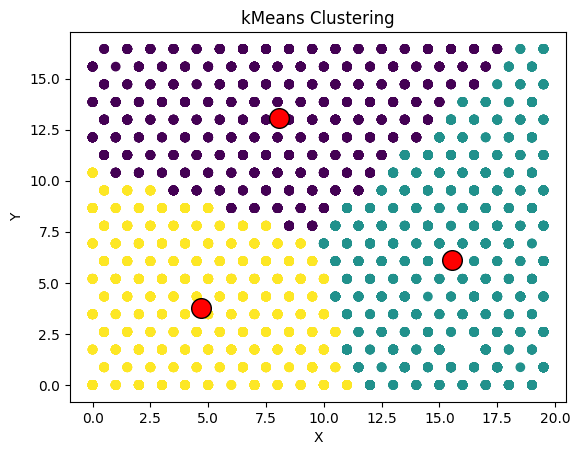

In [36]:
import matplotlib.pyplot as plt
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(hrt[:,0],hrt[:,1], c=labels, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], marker='o', s=200, c='red', edgecolor= 'k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("kMeans Clustering")
plt.show()